# California Sale Properties
Based on the data from realtor.com (December 2022)

In [2]:
library("stringr")
library("ggplot2")
housing <- read.csv("C:\\Users\\Mumen Rider\\Desktop\\Sale Properties in California\\realtor_california_for_sale.csv")
head(housing)

price,bed,bath,sqft,acre_sqft_lot,address
"$1,195,000",4bed,3.5bath,"2,862sqft",5acre lot,"10130 LA Clair Rd, Wilton, CA 95693"
"$564,900",2bed,2.5bath,"2,230sqft","7,405sqft lot","40389 Calle Ebano, Indio, CA 92203"
"$599,999",3bed,2bath,"2,168sqft","8,712sqft lot","135 Hillside Pl, Jackson, CA 95642"
"$735,000",3bed,2bath,"1,583sqft","5,227sqft lot","54960 Avenida Rubio, La Quinta, CA 92253"
"$554,900",3bed,2.5bath,"2,617sqft","9,148sqft lot","22204 Tumbleweed Dr, Canyon Lake, CA 92587"
"$89,500",2bed,2bath,"1,040sqft",21.66acre lot,"13 Oakwood Dr Unit 13, Petaluma, CA 94954"


## Cleaning values for each column

In [3]:
housing$price <- sub('.','', housing$price)
housing$price <- sub('\\$.*','', housing$price)
housing$price <- gsub(',','', housing$price)
housing$price <- as.integer(housing$price)

In [4]:
housing$bed <- sub('bed','', housing$bed)
housing$bed[housing$bed=='Studio'] <- '1'
housing$bed <- as.integer(housing$bed)

In [5]:
housing$bath <- sub('bath','', housing$bath)
housing$bath <- sub('\\+','', housing$bath)
housing$bath <- as.numeric(housing$bath)

In [6]:
housing$sqft <- sub('sqft','', housing$sqft)
housing$sqft <- sub(',','', housing$sqft)
housing$sqft <- as.integer(housing$sqft)

In [7]:
sqft <- housing[str_detect(housing$acre_sqft_lot, 'sqft'),]
colnames(sqft)[5] <- 'sqft_lot'

sqft$sqft_lot <- sub('s.*','', sqft$sqft_lot)
sqft$sqft_lot <- gsub(',','', sqft$sqft_lot)
sqft$sqft_lot <- as.integer(sqft$sqft_lot)

In [8]:
head(sqft)

,price,bed,bath,sqft,sqft_lot,address
2,564900,2,2.5,2230,7405,"40389 Calle Ebano, Indio, CA 92203"
3,599999,3,2.0,2168,8712,"135 Hillside Pl, Jackson, CA 95642"
4,735000,3,2.0,1583,5227,"54960 Avenida Rubio, La Quinta, CA 92253"
5,554900,3,2.5,2617,9148,"22204 Tumbleweed Dr, Canyon Lake, CA 92587"
8,320000,1,1.0,968,4620,"3764 Suter St, Oakland, CA 94619"
9,635000,2,2.0,1000,3733,"734 Tommy Dorsey Ct, Windsor, CA 95492"


In [9]:
acre <- housing[str_detect(housing$acre_sqft_lot, 'acre'),]
colnames(acre)[5] <- 'acre_lot'

acre$acre_lot <- sub('a.*','', acre$acre_lot)
acre$acre_lot <- gsub(',','', acre$acre_lot)
acre$acre_lot <- as.numeric(acre$acre_lot)

In [10]:
head(acre)

,price,bed,bath,sqft,acre_lot,address
1,1195000,4,3.5,2862,5.00,"10130 LA Clair Rd, Wilton, CA 95693"
6,89500,2,2.0,1040,21.66,"13 Oakwood Dr Unit 13, Petaluma, CA 94954"
7,599000,3,3.5,2606,6.92,"30101 Dove Ct, Tehachapi, CA 93561"
12,495000,3,2.0,1516,0.85,"17652 Cindy Ln, Grass Valley, CA 95945"
15,319000,3,2.0,1757,0.32,"20800 Melville Dr, California City, CA 93505"
17,979000,4,2.0,2515,1.34,"11805 Costalot Ln, Lakeside, CA 92040"


## Visualizing Data

In [11]:
options(repr.plot.height=5)
plot_price <- data.frame(Characters=character(), Ints=integer(), stringsAsFactors=FALSE)
colnames(plot_price) <- c('price_range', 'amount')

In [12]:
for (x in seq(100000, 3000000, by=100000)){
    min <- x-100000
    if(x >= 1000000){
        range <- paste('$', as.integer(min)/1000000, 'M - ', as.integer(x)/1000000, 'M', sep='')
    } else {
        range <- paste('$', as.integer(min)/1000, 'k - ', as.integer(x)/1000, 'k', sep='')
    }
    plot_price[nrow(plot_price)+1, ] <- c(range, nrow(subset(housing, housing$price > min & housing$price <= x)))
}

In [13]:
plot_price[nrow(plot_price)+1, ] <- c('$3M - 4M', nrow(subset(housing, housing$price > 3000000)))
plot_price$amount <- as.integer(plot_price$amount)

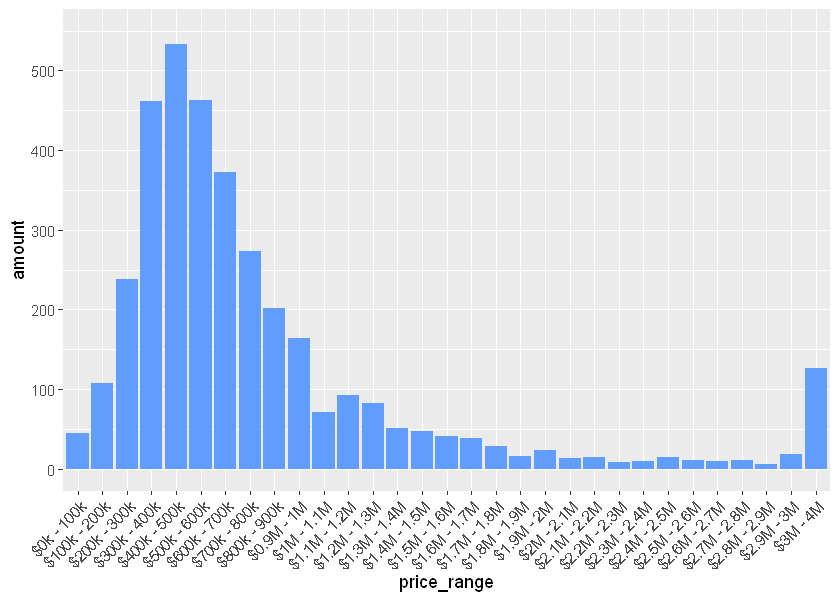

In [14]:
plot <- ggplot(plot_price, aes(price_range, amount)) + 
        geom_bar(stat='identity', fill='#619CFF') +
        theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1)) +
        scale_y_continuous(limits = c(0,550), breaks=seq(0,550,100)) +
        scale_x_discrete(limits=plot_price$price_range)
plot